In [ ]:
import pandas as pd
import numpy as np
df =pd.DataFrame()
df1 =pd.DataFrame()
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm, datasets
from google.colab import drive
drive.mount('/content/drive')

p=np.load('/content/drive/MyDrive/PRML/IITM/Question3/Dataset_Kernel_Train.npy')
n=np.load('/content/drive/MyDrive/PRML/IITM/Question3/Dataset_Kernel_Test.npy')
print(p)#print Train Data
print(n)#print Test Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[ 0.67948662  0.45693871 -1.        ]
 [-0.71640822  0.84386449 -1.        ]
 [-0.18316076  1.1392317  -1.        ]
 ...
 [ 0.35061152  0.16281987  1.        ]
 [ 0.60909634  0.72165021 -1.        ]
 [ 1.75291432 -0.30756823  1.        ]]
[[ 0.82980067  0.63288916 -1.        ]
 [-0.87078017  0.27441862 -1.        ]
 [ 0.75664501  0.80039479 -1.        ]
 ...
 [-0.67091527  0.75856533 -1.        ]
 [ 1.7115388  -0.43646191  1.        ]
 [-1.04707707  0.13981103 -1.        ]]


# For Train Data

In [ ]:
x1=[]
x2=[]
y=[]
for i in range(p.shape[0]):
    x1.append(p[i][0])
    x2.append(p[i][1]) 
    y.append(p[i][2])
df['x1'] =x1     
df['x2'] =x2  
df['y'] =y  
y=df
#df

# Plot  the  Training  data  points  and  indicate  by  different  colours  the  points  belonging to the different classes 

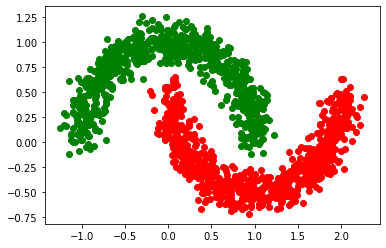

In [ ]:
v=df['y'].values
v1=df['x1'].values
v2=df['x2'].values
for i in range(df.shape[0]):
    if(v[i]<0):
        plt.scatter(v1[i],v2[i],color='green')
    else:
        plt.scatter(v1[i],v2[i],color='red')
plt.savefig('Kernelimage.png')

# For Test Data

In [ ]:
x1=[]
x2=[]
y=[]
for i in range(n.shape[0]):
    x1.append(p[i][0])
    x2.append(p[i][1]) 
    y.append(p[i][2])
df1['x1'] =x1     
df1['x2'] =x2  
df1['y'] =y  
#df1

In [ ]:
X_Train = df.iloc[:, :2]  
y_Train = df.y
X_Train=X_Train.values
y_Train=y_Train.values
X_Test = df1.iloc[:, :2]  
y_Test = df1.y
X_Test=X_Test.values
y_Test=y_Test.values
print(X_Train.shape)
print(y_Train.shape)
print(X_Test.shape)
print(y_Test.shape)

(1500, 2)
(1500,)
(500, 2)
(500,)


In [ ]:
class SVM_Kernel:
    def __init__(self, C=1.0, kernel='rbf', gamma=0.1, degree=2):
 
        if kernel == 'poly':
            self.kernel = self.polynomial_kernel
            self.degree = degree
            self.c = 1
            
        else:
            self.kernel = self._rbf_kernel
            self.gamma = gamma
 
        self.support_vectors = None
        self.C = C 
        self.b = None
        self.w = None
        self.X = None
        self.y = None
        self.K = None
    def polynomial_kernel(self, X1, X2):
        return (self.c + X1.dot(X2.T)) ** self.degree
    
    def _rbf_kernel(self, X1, X2):
        return np.exp(-(1 / self.gamma ** 2) * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], axis=2) ** 2)
 
    
    def fit(self, X, y, lr=1e-5, epochs=400):
        # Initialize al the value
        self.w = np.random.randn(X.shape[0])
        self.b = 0
        self.X = X
        self.y = y
        # Kernel Matrix
        self.K = self.kernel(X, X)
        loss_array = []
        for i in range(epochs):
            margin = self.Margin(X, y)
            misclassified_index = np.where(margin < 1)[0]
            d_w = self.K.dot(self.w) - self.C * y[ misclassified_index].dot(self.K[ misclassified_index])
            self.w = self.w - lr * d_w
            d_b = - self.C * np.sum(y[ misclassified_index])
            self.b = self.b - lr * d_b
            loss = (1 / 2) * self.w.dot(self.K.dot(self.w)) + self.C * np.sum(np.maximum(0, 1 - margin))
            loss_array.append(loss)
 
        self.support_vector = np.where(self.Margin(X, y) <= 1)[0]
 
    def predict(self, X):
        return np.sign(self.decision_func(X))
    
    def decision_func(self, X):
        return self.w.dot(self.kernel(self.X, X)) + self.b
 
    def Margin(self, X, y):
        return y * self.decision_func(X)
    
 
    def score(self, X, y):#return prediction
        prediction = self.predict(X)
        return np.mean(y == prediction)
    

# Calculate Accuracy For Train Data

In [ ]:
if __name__ == '__main__':
    svmp = SVM_Kernel(C=1.0, kernel='poly', degree=1)
    svmp.fit(X_Train, y_Train, lr=1e-5, epochs=500)
    p=svmp.score(X_Train, y_Train)
    print("Train score(polynomial):", round(p,4))
    
    svmr = SVM_Kernel(C=10.0, kernel='rbf', gamma=0.3)
    svmr.fit(X_Train, y_Train, lr=1e-3)
    s=svmr.score(X_Train, y_Train)
    print("Train score(rbf):",s)

Train score(polynomial): 0.85
Train score(rbf): 1.0


# Calculate Accuracy For Test Data

In [ ]:
print("Test score(polynomial):", svmp.score(X_Test, y_Test))

print("Test score(rbf):", svmr.score(X_Test, y_Test))

Test score(polynomial): 0.858
Test score(rbf): 1.0


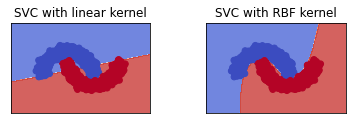

In [ ]:

from sklearn import svm, datasets
X = X_Train  
y = y_Train

h = .02  # step size in the mesh
C = 10.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.3, C=C).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel'
          ]
          
for i, clf in enumerate((svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.savefig('Kernelimage202.png')

plt.show()


# Plot_decision_regions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


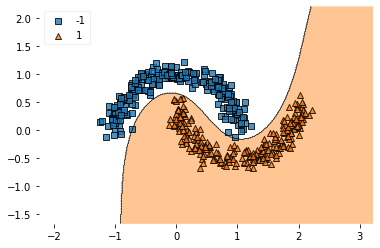

In [ ]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_Test, y_Test.astype(np.integer), clf=rbf_svc, legend=2)
plt.savefig('KernelimageTr.png')